In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

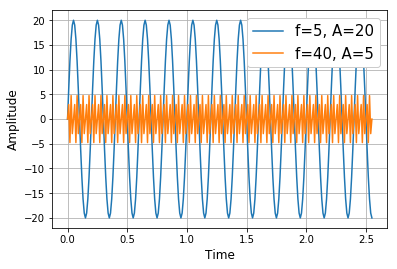

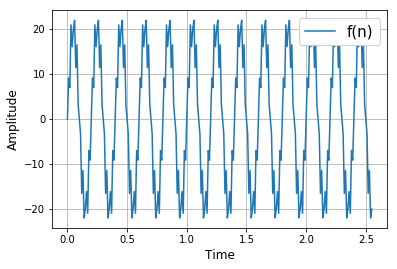

In [106]:
N = 256            # サンプル数
dt = 0.01          # サンプリング間隔
fq1, fq2 = 5, 40    # 周波数
fc = 20  # カットオフ周波数
A1, A2 = 20, 5
t = np.arange(0, N*dt, dt)  # 時間軸
freq = np.linspace(0, 1.0/dt, N)  # 周波数軸

f1 = A1 * np.sin(2 * np.pi * fq1 * t)
f2 = A2 * np.sin(2*np.pi*fq2*t)
f = f1 + f2

plt.plot(t, f1, label='f=5, A=20')
plt.plot(t, f2, label='f=40, A=5')

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)
plt.show()

plt.plot(t, f, label='f(n)')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)
plt.show()

In [107]:
F = np.fft.fft(f)
# 正規化 + 交流成分2倍
F = F/(N/2)
F[0] = F[0]/2

# 配列Fをコピー
F2 = F.copy()
# ローパスフィル処理（カットオフ周波数を超える帯域の周波数信号を0にする）
F2[(freq > fc)] = 0
# 高速逆フーリエ変換（時間信号に戻す）
f2 = np.fft.ifft(F2)

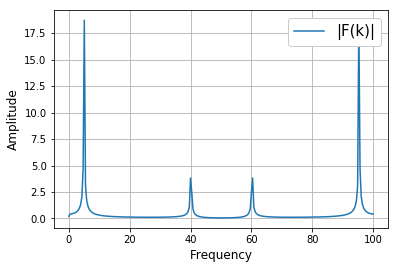

In [108]:
plt.plot(freq, np.abs(F), label='|F(k)|')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

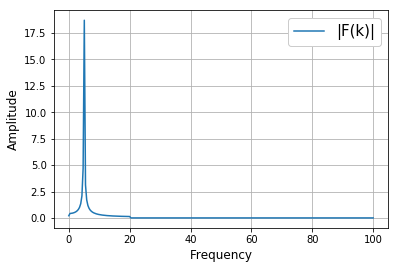

In [109]:
plt.plot(freq, np.abs(F2), label='|F(k)|')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

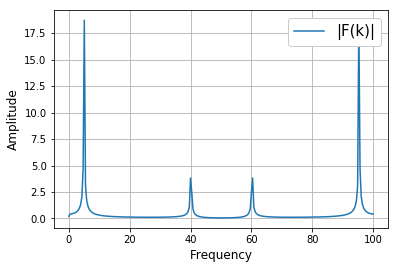

In [110]:
plt.plot(freq, np.abs(F), label='|F(k)|')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

In [111]:
# 高速逆フーリエ変換（時間信号に戻す）
f2 = np.fft.ifft(F2)

# 振幅を元のスケールに戻す
f2 = np.real(f2*N)

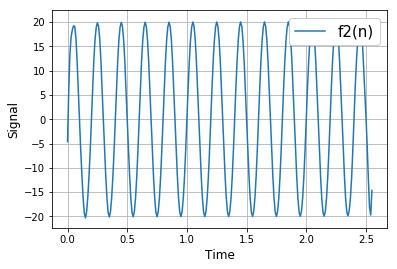

In [112]:
plt.plot(t, f2, label='f2(n)')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)
plt.show()